In [69]:
import pandas as pd
import numpy as np

#removes warning about modifications on slice of dataframe
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('FIFAvsReal-Life.csv')
                 #, header=[0,1])
#df.columns = df.columns.map('_'.join)
df.head()

,Unnamed: 0,Players,club,league,age,nationality,Position,overall,pac,sho,...,12/13.9,12/13.10,12/13.11,12/13.12,12/13.13,12/13.14,12/13.15,12/13.16,12/13.17,12/13.18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sub,CO,Off,Pen SV,Pen M,Goals conceded,Conceded 1+,OG,Apps,Form
1,0.0,Aaron Cresswell,West Ham United,English Premier League,27.0,England,Defender,76.0,76.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,Aaron Hughes,Heart of Midlothian,Scottish Premiership,37.0,Northern Ireland,Defender,71.0,23.0,35.0,...,15.0,1.0,0.0,0.0,0.0,43.0,23.0,0.0,24.0,1.625
3,2.0,Aaron Hunt,Hamburger SV,German Bundesliga,30.0,Germany,Midfielder,76.0,68.0,73.0,...,2.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,28.0,4.035714285714286
4,3.0,Aaron Lennon,Everton,English Premier League,30.0,England,Midfielder,77.0,83.0,64.0,...,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,34.0,3.147058823529412


In [3]:
df = df.iloc[1:, 1:14].set_index('Players')

In [4]:
df

,club,league,age,nationality,Position,overall,pac,sho,pas,dri,def,phy
Players,,,,,,,,,,,,
Aaron Cresswell,West Ham United,English Premier League,27.0,England,Defender,76.0,76.0,59.0,72.0,76.0,73.0,68.0
Aaron Hughes,Heart of Midlothian,Scottish Premiership,37.0,Northern Ireland,Defender,71.0,23.0,35.0,52.0,51.0,72.0,70.0
Aaron Hunt,Hamburger SV,German Bundesliga,30.0,Germany,Midfielder,76.0,68.0,73.0,75.0,77.0,39.0,64.0
Aaron Lennon,Everton,English Premier League,30.0,England,Midfielder,77.0,83.0,64.0,71.0,82.0,38.0,62.0
Aaron Leya Iseka,SV Zulte-Waregem,Belgian First Division A,19.0,Belgium,Forward,68.0,79.0,69.0,49.0,68.0,21.0,63.0
Aaron Niguez,Real Oviedo,Spanish Segunda Division,28.0,Spain,Midfielder,73.0,82.0,65.0,68.0,76.0,43.0,65.0
Aaron Ramsdale,Bournemouth,English Premier League,19.0,England,Goalkeeper,61.0,62.0,59.0,53.0,68.0,35.0,58.0
Aaron Ramsey,Arsenal,English Premier League,26.0,Wales,Midfielder,82.0,68.0,75.0,79.0,81.0,65.0,75.0
Aaron Seydel,Holstein Kiel,German 2. Bundesliga,21.0,Germany,Forward,64.0,61.0,62.0,44.0,61.0,28.0,68.0


In [75]:
weightage = pd.DataFrame({'Position': df['Position'].unique(),
                         'pac': [0.2, 0.2, 0.25, 0.2],
                         'sho':[0.2, 0.2, 0.3, 0.2],
                          'pas':[0.2, 0.2, 0.05, 0.2],
                         'dri':[0.2, 0.2, 0.1, 0.2],
                         'def':[0.2, 0.2, 0.05, 0.2],
                         'phy':[0.2, 0.2, 0.25, 0.2],
                         })

In [77]:
weightage.set_index('Position', inplace=True)

In [78]:
weightage

,pac,sho,pas,dri,def,phy
Position,,,,,,
Defender,0.20,0.2,0.20,0.2,0.20,0.20
Midfielder,0.20,0.2,0.20,0.2,0.20,0.20
Forward,0.25,0.3,0.05,0.1,0.05,0.25
Goalkeeper,0.20,0.2,0.20,0.2,0.20,0.20


In [119]:
forwards = df[df['Position']=='Forward']
midfielders = df[df['Position']=='Midfielder']
defenders = df[df['Position']=='Defender']

In [120]:
forwards['Score'] = (forwards.iloc[:, 6:] * weightage.loc['Forward']).sum(axis=1)

In [115]:
forwards = forwards.reset_index()

In [122]:
forwards

,club,league,age,nationality,Position,overall,pac,sho,pas,dri,def,phy,Score
Players,,,,,,,,,,,,,
Aaron Leya Iseka,SV Zulte-Waregem,Belgian First Division A,19.0,Belgium,Forward,68.0,79.0,69.0,49.0,68.0,21.0,63.0,66.50
Aaron Seydel,Holstein Kiel,German 2. Bundesliga,21.0,Germany,Forward,64.0,61.0,62.0,44.0,61.0,28.0,68.0,60.55
Aaron Wan-Bissaka,Crystal Palace,English Premier League,19.0,DR Congo,Forward,55.0,73.0,48.0,50.0,60.0,28.0,46.0,54.05
Aaron Wilbraham,Bolton Wanderers,English Championship,37.0,England,Forward,64.0,37.0,62.0,56.0,52.0,27.0,67.0,53.95
Abdelkader Oueslati,Al Fateh,Saudi Professional League,25.0,Tunisia,Forward,65.0,68.0,52.0,62.0,69.0,61.0,68.0,62.65
Abdoulay Diaby,Club Brugge KV,Belgian First Division A,26.0,Mali,Forward,72.0,91.0,71.0,65.0,69.0,34.0,63.0,71.65
Abel Hernandez,Hull City,English Championship,26.0,Uruguay,Forward,75.0,83.0,72.0,58.0,74.0,29.0,71.0,71.85
Aboubakar Kamara,Fulham,English Championship,22.0,France,Forward,69.0,80.0,65.0,52.0,65.0,25.0,74.0,68.35
Adam Armstrong,Bolton Wanderers,English Championship,20.0,England,Forward,67.0,87.0,67.0,54.0,67.0,26.0,67.0,69.30


In [117]:
#forwards = forwards.groupby('nationality')

In [118]:
forwards.head()

,Players,club,league,age,nationality,Position,overall,pac,sho,pas,dri,def,phy,Score
0,Aaron Leya Iseka,SV Zulte-Waregem,Belgian First Division A,19.0,Belgium,Forward,68.0,79.0,69.0,49.0,68.0,21.0,63.0,66.50
1,Aaron Seydel,Holstein Kiel,German 2. Bundesliga,21.0,Germany,Forward,64.0,61.0,62.0,44.0,61.0,28.0,68.0,60.55
2,Aaron Wan-Bissaka,Crystal Palace,English Premier League,19.0,DR Congo,Forward,55.0,73.0,48.0,50.0,60.0,28.0,46.0,54.05
3,Aaron Wilbraham,Bolton Wanderers,English Championship,37.0,England,Forward,64.0,37.0,62.0,56.0,52.0,27.0,67.0,53.95
4,Abdelkader Oueslati,Al Fateh,Saudi Professional League,25.0,Tunisia,Forward,65.0,68.0,52.0,62.0,69.0,61.0,68.0,62.65
5,Abdoulay Diaby,Club Brugge KV,Belgian First Division A,26.0,Mali,Forward,72.0,91.0,71.0,65.0,69.0,34.0,63.0,71.65
6,Abel Hernandez,Hull City,English Championship,26.0,Uruguay,Forward,75.0,83.0,72.0,58.0,74.0,29.0,71.0,71.85
7,Aboubakar Kamara,Fulham,English Championship,22.0,France,Forward,69.0,80.0,65.0,52.0,65.0,25.0,74.0,68.35
8,Adam Armstrong,Bolton Wanderers,English Championship,20.0,England,Forward,67.0,87.0,67.0,54.0,67.0,26.0,67.0,69.30
9,Adam Campbell,Morecambe,English League Two,22.0,England,Forward,63.0,84.0,59.0,51.0,62.0,23.0,53.0,61.85


In [31]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
X_all, y_all = forwards.loc[:,['pac','sho','pas','dri','def','phy']], forwards['overall']
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression()
#features = PolynomialFeatures(degree=2)
#model = Pipeline([
 #   ('polynomial_features', features),
  #  ('logistic_regression', linreg)
#])
#model = model.fit(X_all_train, y_all_train)
#y_pred = model.predict(X_all_test) 

linreg.fit(X_all_train, y_all_train)
y_all_pred = linreg.predict(X_all_test) 

In [34]:
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
    % mean_squared_error(y_all_test, y_all_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_all_test, y_all_pred))

Coefficients: 
 [0.00650003 0.3036697  0.06790636 0.34656838 0.08141783 0.16451951]
Mean squared error: 4.15
Variance score: 0.91


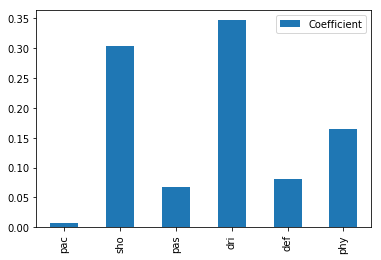

In [37]:
coeff_df = pd.DataFrame(linreg.coef_, X_all.columns, columns=['Coefficient'])
coeff_df.plot(kind='bar')

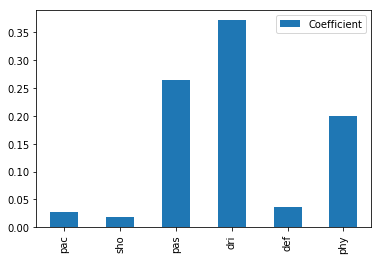

In [39]:
X_midfielders, y_midfielders = midfielders.loc[:,['pac','sho','pas','dri','def','phy']], midfielders['overall']
X_midfielders_train, X_midfielders_test, y_midfielders_train, y_midfielders_test = train_test_split(
    X_midfielders, y_midfielders, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression()
linreg.fit(X_midfielders_train, y_midfielders_train)
y_midfielders_pred = linreg.predict(X_midfielders_test) 

coeff_df = pd.DataFrame(linreg.coef_, X_midfielders.columns, columns=['Coefficient'])
coeff_df.plot(kind='bar')

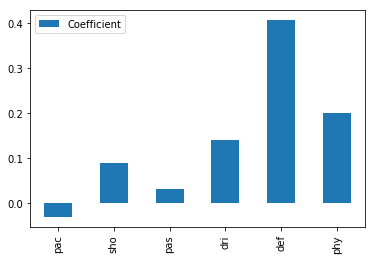

In [40]:
#linear regression on 6 factors to predict overall rating

X_defenders, y_defenders = defenders.loc[:,['pac','sho','pas','dri','def','phy']], defenders['overall']
X_defenders_train, X_defenders_test, y_defenders_train, y_defenders_test = train_test_split(
    X_defenders, y_defenders, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression()

linreg.fit(X_defenders_train, y_defenders_train)
y_defenders_pred = linreg.predict(X_defenders_test) 

coeff_df = pd.DataFrame(linreg.coef_, X_defenders.columns, columns=['Coefficient'])
coeff_df.plot(kind='bar')